<center><span style="font-size: 36pt">INDENG 242A: Homework 2</span></center>
<center><span style="font-size: 24pt">Capucine Hustin</span></center>

<u><span style="font-size: 24pt">Problem 2</span></u>

<u><span style="font-size: 18pt">Question a</span></u>

In [1]:
# uploading the data
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#open the first csv
test = pd.read_csv('framingham_test_sp24.csv')
train = pd.read_csv('framingham_train_sp24.csv')

In [2]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,63,Some high school,0,0,0,0,1,0,293,193.0,63.0,30.00,70,76,1
1,1,41,High school/GED,1,40,0,0,0,0,310,117.5,80.0,26.74,80,78,0
2,1,58,Some college/vocational school,0,0,0,0,0,0,250,109.0,78.5,25.26,90,83,0
3,1,43,Some high school,1,43,0,0,0,0,215,122.0,76.0,26.84,85,74,0
4,1,46,College,0,0,0,0,1,0,220,136.5,99.5,27.78,80,70,0


In [3]:
import statsmodels.formula.api as smf

In [4]:
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.375973
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1285
Time:                        15:40:07   Log-Likelihood:                -962.49
converged:                       True   LL-Null:                       -1104.4
Covariance Type:            nonrobust   LLR p-value:                 2.367e-50
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

The regression is: 

$$
\text{P(Y=1)} =\frac{1}{1+e^{-W}} \\
$$


Where:

$$
W= -9.0826  + 0.4217 \times \text{male} + 0.0711 \times \text{age} + 0.1506 \times \text{currentSmoker} + 0.0250 \times \text{cigsPerDay} + 0.2873 \times \text{BPMeds}  + 0.7975 \times \text{prevalentStroke}  + 0.2215 \times \text{prevalentHyp} - 0.0481 \times \text{diabetes} + 0.0028 \times \text{totChol} + 0.0092 \times \text{sysBP} + 0.0077 \times \text{diaBP} + 0.0058 \times \text{BMI} - 0.0042 \times \text{heartRate} + 0.0082 \times \text{glucose}  - 0.1220 \times \mathbb{1}_{\text{T.High school/GED}} - 0.0870 \times \mathbb{1}_{\text{T.Some college/vocational school}} + 0.0519 \times \mathbb{1}_{\text{T.Some high school}}
$$

The most important factors are the ones with a low p-value (<0.005). Those are then: male, age, cigsPerDay and glucose. 

One of the most important risk factors is age (it has a p-value of 0.000). The coefficient is 0.0711 (>0). Therefore, the older someone is, the higher W will be, and consequently, the probability of P(Y=1) will be closer to one. The older you are, the more likely you are to have a 10-year CHD.

Let's look at the odds:

$$
odd(x)=\frac{P(Y=1|X=x)}{P(Y=0|X=x)}=e^{\beta x}
$$

So if the variable $x_i$ which represent the age increase by 1 the odd is multiplied by $e^{\beta_i}$ ≈ 1.07. Which is an increase of 7%.

$$
\mathbb{E}\text{[cost with prescription]}= 0.15 \times p \times 1000000 + (1-0.15 \times p)\times 100000 = 100 000 + 135 000 \times p \\
\mathbb{E}\text{[cost without prescription]}= 900 000 \times p 
$$

So, 

$$
\mathbb{E}\text{[cost with prescription]} \leq \mathbb{E}\text{[cost without prescription]} \Leftrightarrow 0.15 \times p \times 1000000 + (1-0.15 \times p)\times 100000 = 100 000 + 135 000 \times p \leq 900 000 \times p  \Leftrightarrow p \geq \frac{20}{153}
$$

Thus, 
$$
\overline{p}=\frac{20}{153}≈0.13
$$

In [6]:
y_test = test['TenYearCHD']

y_prob = logreg.predict(test)
y_pred = pd.Series([1 if x > 20/153 else 0 for x in y_prob], index=y_prob.index)
#p is 20/153

0       1
1       1
2       1
3       0
4       1
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Length: 1098, dtype: int64

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[568 370]
 [ 47 113]]


The confusion matrix represents:

TN FP

FN TP

$$
\text{Accuracy}=\frac{TN + TP}{TN + FP + FN + TP}=\frac{568+113}{568+370+47+113}=\frac{227}{366}≈0.62
$$

$$
\text{TPR}=\frac{TP}{All positives}=\frac{113}{113+47}=\frac{113}{160}≈0.71
$$

$$
\text{FPR}=\frac{FP}{All negatives}=\frac{370}{370+568}=\frac{145}{469}≈0.39
$$

The Accuracy measures how well the model predict all the cases. It shows the frequency of correct answers (predictions). \
Here, the Accuracy is close to 0.62, which means that 62% of the testing data set was correctly forecasted. The more the Accuracy is close to 1 the better it is. 

The True Positive Rate measures how well the model correctly identifies the people who will develop CHD. It represents: among all the people who actually developed CHD, how many of them did the model correctly classify as having CHD.\
Here, the TPR is 0.71, which mean that 71% of the people that developed CHD was spotted by the model. The more the TPR is close to 1 the better it is. 

The Negative Positive Rate measures how often the model classify a person that will not develop CHD as someone who will. Which is that, out all of the people that never developed CHD, how many of them were incorrectly predicted as developing CHD by the model.\
Here, the FPR is 0.39, which means that 39% of the people that has never developed CHD was considered as future CHD developer by the model. 

If we assume that the CHD outcomes in the test set are not affected by the treatment decision, we have:

$$
\mathbb{E}\text{[cost per patient]}= \frac{100000 \times \text{number of people getting the medication} + 900000 \times \text{number of people getting a 10 year CHD}}{\text{number of patients}}
$$

In [12]:
print("The expected economic cost per patient is:",(100000*sum(y_pred)+900000*sum(y_test))/len(y_pred))

the expected economic cost per patient is: 175136.61202185793


This assumption is not reasonnable. According to the assignment, the medication leads to a 85% decrease of the probability of developing CHD within the next 10 years. 

Now, we will supose that, once a patient take the medication, his chances of having CHD decreases by 85%. The new equation is then:

$$
\mathbb{E}\text{[cost per patient]}= \frac{\sum_{\text{patient i}}(100 000 + 0.15 \times 900000 \times \mathbb{1}_{\text{CHD}})\times \mathbb{1}_{\text{medication}} + 900 000 \times \mathbb{1}_{\text{no medication}} \times \mathbb{1}_{\text{CHD}}}{\text{number of patients}}
$$

In [14]:
E=0
for i in range(len(test)):
    if y_pred[i]==1:
        E+=100000
        if y_test[i]==1:
            E+=0.15*900000
    elif y_test[i]==1:
        E+=900000

print("The expected economic cost per patient is:",E/len(test))

The expected economic cost per patient is: 96407.10382513661


Baseline model:

In [15]:
CHD = np.sum(y_test)  # get CHD within 10 years
CHD_no=len(y_test)-CHD # doesn't get CHD within 10 years


print("Accuracy=",CHD_no/len(y_test))
print("TPR=",0)
print("FPR=",0)

Accuracy= 0.8542805100182149
TPR= 0
FPR= 0


With this model we have a better (higher) Accuracy than the one with the threshold at 0.13. \
We also have a better (lower) False Positive Rate. This isi logical as no patient are at high risk with this model. This indicator can be interesting to save money on useless medication. \
However we have a way worse True Positive Rate. We never correctly identify when someone is actually at high risk. This can be a huge problem for the health of our patient. 

In [26]:
new_patient = pd.DataFrame(data = {'male' : [1], 'age' : [52], 'education' : ['College'],
                               'currentSmoker' : [1], 'cigsPerDay' : [4], 'BPMeds' : [0], 'prevalentStroke': [0], 'prevalentHyp':[0], 'diabetes':[1], 'totChol':[180], 'sysBP':[120], 'diaBP':[90], 'BMI':[26], 'heartRate':[70], 'glucose':[100]})
logreg.predict(new_patient)

0    0.142586
dtype: float64

This patient has a probability of having a CHD within the next 10 years with 0.14. This is superior than the threshold we have computed in (iii), that was equal to 20/153 (≈0.13).\
The physician should then prescribe the preventive medication for this patient.

<u><span style="font-size: 18pt">Question b</span></u>

In [24]:
y_train = train['TenYearCHD']
X_train = train.drop(['TenYearCHD'], axis=1)

X_test = test.drop(['TenYearCHD'], axis=1)
#we already have y_test

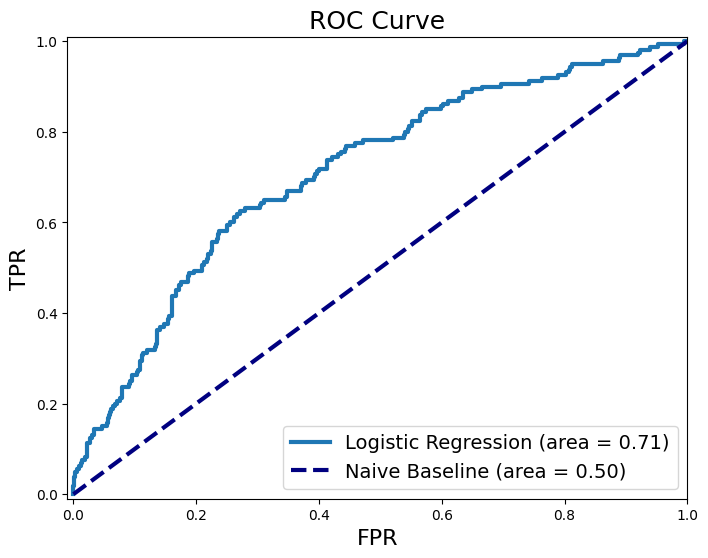

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

This curve can be usefull to have a tradeoff between a good TPR and a good FPR. The better the TPR gets the worse the FPR gets and vice versa. \
Thus, with this curve we can find a tradeoff. A good TPR is important to detect the future sick people and save the 900 000. A good FPR is important to save money on useless medication. We can chose a threshold with this curve according to what we want FPR and TPR. \
Decision-makers can also compare this ROC curve with those of other possible medications for preventing CHD. This can be usefull to determine which medication to take. 

We can see that the curve is steep from [0,0.3]. So the model improves a lot in terms of TPR while the FPR doesn't get "really" worse, only a little. 

The AUC of the logistic regression i_s 0.71. This is better than 0.5, so this model is better than a random guessing. 

<u><span style="font-size: 18pt">Question c</span></u>

$$
\mathbb{E}\text{[cost with prescription]}= C + 0.15 \times p \times 600000  \\
\mathbb{E}\text{[cost without prescription]}= 600 000 \times p 
$$

The cost here, is the cost for the PATIENT, what he/she will have to pay. 

We want that the patient take the medication if and only if his/her probability of having CHD within the next 10 years is above $\overline{p}$. Which is equivalent to:

$$
\mathbb{E}\text{[cost with prescription]} \leq \mathbb{E}\text{[cost without prescription]} \Leftrightarrow p \geq \overline{p}
$$

And, 

$$
\mathbb{E}\text{[cost with prescription]} \leq \mathbb{E}\text{[cost without prescription]} \Leftrightarrow C + 600000\times 0.15 \times p \leq 600 000 \times p \Leftrightarrow C\leq 510 000 \times p
$$

Thus, we have to fix C that way: 
$$
C= 510 000 \times \overline{p} = 510 000 \times \frac{20}{153}=\frac{200 000}{3} ≈ \$66 667
$$

<u><span style="font-size: 18pt">Question d</span></u>

There are some aspects of of the analysis performed that raises ethical concerns, especially the fact that everything is based on the money saved and not on the health of people. All the threshold, the computation were centered around the profit or cost but we can argue that the health of people is more important. \
A way to change the analysis could be to change the decision metrics. Instead of using the cost of medication and CHD, we can use an other index. For instance, the pain of the medication side effect and the pain of CHD on a scale for 0 to 100. This data might be harder to collect, but the approach would be more ethical I think.